
Analysis of Airplane Crashes

Last Updated: January 27th, 2025

Daily Challenge: Analysis of Airplane Crashes and Fatalities


👩‍🏫 👩🏿‍🏫 What You’ll learn

    Comprehensive data analysis techniques using Python, Pandas, NumPy, and SciPy.
    Methods for data cleaning, exploratory analysis, statistical testing, and visualization.
    Insightful interpretation of complex datasets.


🛠️ What you will create

    A thorough analysis of the “Airplane Crashes and Fatalities up to 2023” dataset, including detailed visualizations and statistical insights.


Objective:

Utilize Python, Pandas, NumPy, and SciPy to conduct a thorough analysis of the “Airplane Crashes and Fatalities upto 2023” dataset. This challenge will encompass data cleaning, exploratory analysis, statistical testing, and visualization to draw meaningful insights.


Dataset:

Work with the “Airplane Crashes and Fatalities upto 2023” dataset, which provides comprehensive details about airplane crashes, including dates, locations, fatalities, and more. Access the dataset here.


Tasks:

1. Data Import and Cleaning:

    Import the dataset using Pandas.
    Clean and preprocess the data, addressing missing values and categorizing data as needed.
    Convert dates and other relevant fields to appropriate formats.

2. Exploratory Data Analysis:

    Use Pandas to explore basic statistics such as the number of crashes, fatalities, and survival rates.
    Analyze the frequency of crashes over time to identify any trends.

3. Statistical Analysis:

    Apply SciPy to analyze the distribution of fatalities and survival rates. Calculate key statistics like mean, median, and standard deviation.
    Conduct a hypothesis test (e.g., comparing the average number of fatalities in different decades or regions).

4. Visualization:

    Create charts and graphs using Matplotlib and Seaborn to visualize the findings from your exploratory data analysis and statistical tests.
    Examples might include time series plots of crashes over years, bar charts of crashes by region, and histograms of fatalities.

5. Insight and Report:

    Summarize your findings and provide insights into the patterns or anomalies discovered in the data.
    Prepare a well-structured report including all code, visualizations, and interpretations.


Submission:

You should submit a comprehensive report encompassing their code, analysis, and visualizations. Articulate how you have applied NumPy, Pandas, and SciPy in your analysis, highlighting any significant patterns or insights discovered in the dataset.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
import warnings

In [18]:
# Lecture
df = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv", encoding="ISO-8859-1")

# Nettoyage
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])

# Ajout d'une colonne "Année"
df['Year'] = df['Date'].dt.year

# Remplacer les NaN dans les colonnes utiles
df['Aboard'] = pd.to_numeric(df['Aboard'], errors='coerce')
df['Fatalities'] = pd.to_numeric(df['Fatalities'], errors='coerce')
df['Survivors'] = df['Aboard'] - df['Fatalities']
df['Survival Rate'] = df['Survivors'] / df['Aboard']

Total crashes: 4998


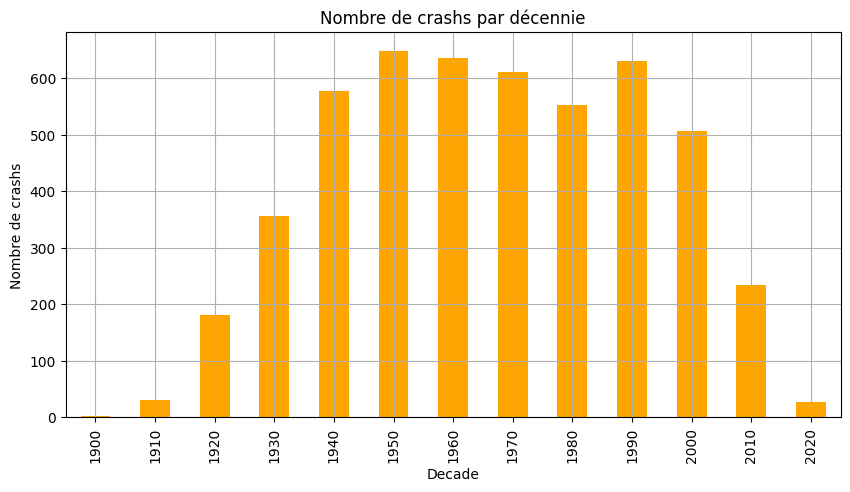

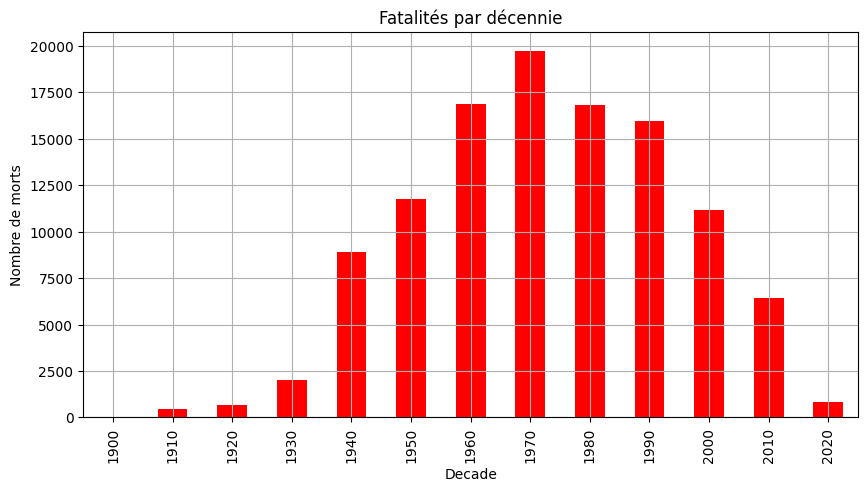

In [17]:
# Nombre total de crashs
print("Total crashes:", len(df))

# Crashes par décennie
df['Decade'] = (df['Year'] // 10) * 10
crashes_by_decade = df.groupby('Decade').size()
fatalities_by_decade = df.groupby('Decade')['Fatalities'].sum()

# Affichage
plt.figure(figsize=(10,5))
crashes_by_decade.plot(kind='bar', color='orange')
plt.title("Nombre de crashs par décennie")
plt.ylabel("Nombre de crashs")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
fatalities_by_decade.plot(kind='bar', color='red')
plt.title("Fatalités par décennie")
plt.ylabel("Nombre de morts")
plt.grid(True)
plt.show()

In [16]:
# Extraction des échantillons
fata_1950s = df[df['Decade'] == 1950]['Fatalities'].dropna()
fata_2000s = df[df['Decade'] == 2000]['Fatalities'].dropna()

# Moyennes
mean_50s = np.mean(fata_1950s)
mean_00s = np.mean(fata_2000s)

# Test t de Student (variances supposées égales)
t_stat, p_val = stats.ttest_ind(fata_1950s, fata_2000s, equal_var=True)

# Calcul du seuil critique pour alpha = 0.05
n1, n2 = len(fata_1950s), len(fata_2000s)
ddl = n1 + n2 - 2
seuil_critique = stats.t.ppf(1 - 0.05 / 2, ddl)

print(f"T-statistic = {t_stat:.2f}")
print(f"P-value = {p_val:.4f}")
print(f"Degrés de liberté = {ddl}")
print(f"Seuil critique (alpha=0.05) = ±{seuil_critique:.2f}")

# Interprétation
if abs(t_stat) > seuil_critique:
    print("Il y a une différence statistiquement significative.")
else:
    print("Aucune différence significative détectée.")

T-statistic = -2.28
P-value = 0.0227
Degrés de liberté = 1153
Seuil critique (alpha=0.05) = ±1.96
Il y a une différence statistiquement significative.


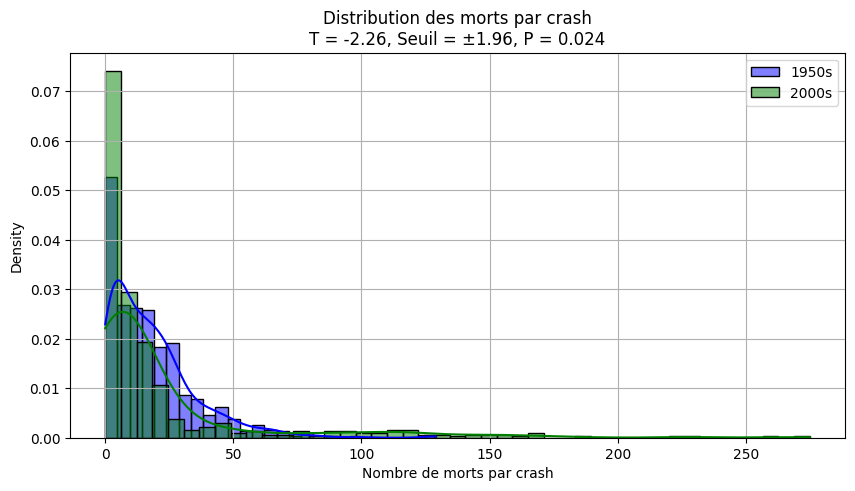

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(fata_1950s, kde=True, label='1950s', color='blue', stat="density")
sns.histplot(fata_2000s, kde=True, label='2000s', color='green', stat="density")
plt.legend()
plt.title(f"Distribution des morts par crash\nT = {t_stat:.2f}, Seuil = ±{seuil_critique:.2f}, P = {p_val:.3f}")
plt.xlabel("Nombre de morts par crash")
plt.grid(True)
plt.show()

les graphiques me montrent une augmentation du nombre de morts jusqu’en 1970, suivie d’une baisse significative malgré la constance (ou baisse) du nombre de crashs, suggère des changements structurels dans l’industrie aéronautique.

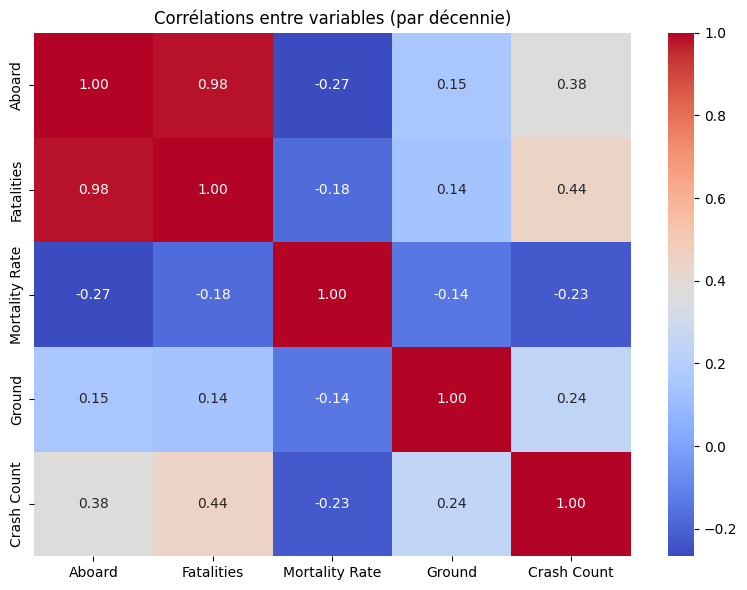

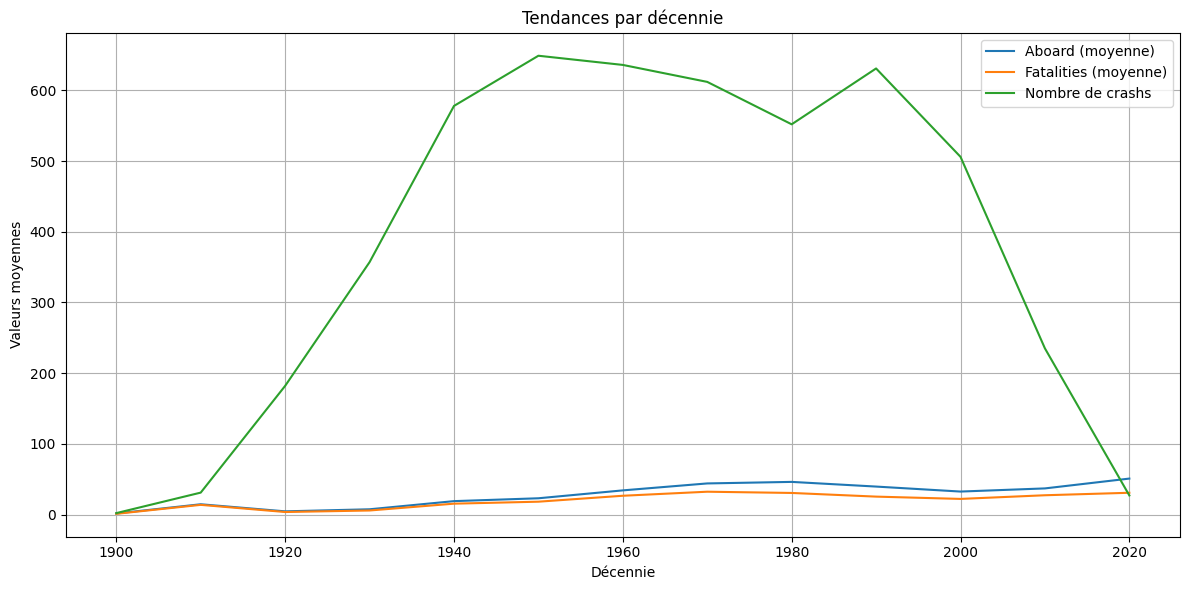

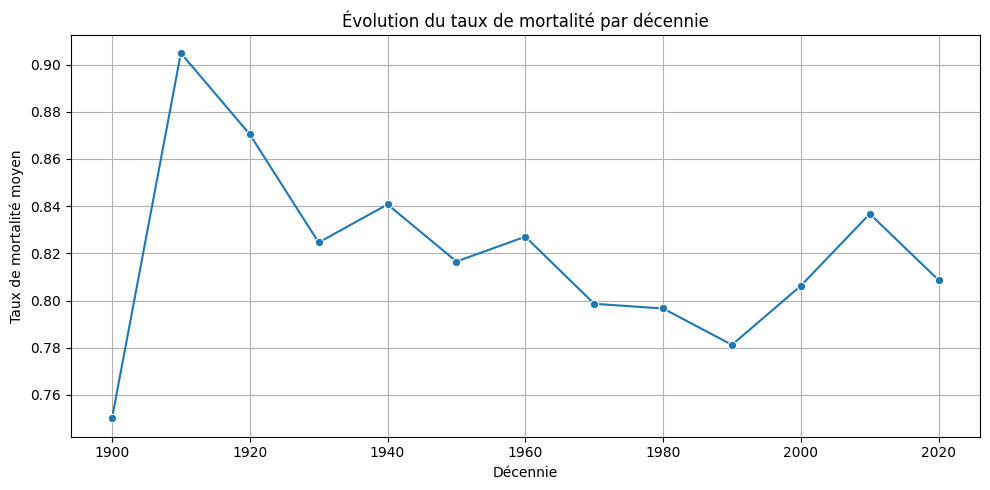

In [ ]:
# Extraire année et décennie
df['Year'] = df['Date'].dt.year
df['Decade'] = (df['Year'] // 10) * 10

# Remplacer les valeurs manquantes
df['Aboard'] = df['Aboard'].fillna(0)
df['Fatalities'] = df['Fatalities'].fillna(0)
df['Ground'] = df['Ground'].fillna(0)

# Calculer taux de mortalité
df['Mortality Rate'] = df.apply(lambda x: x['Fatalities'] / x['Aboard'] if x['Aboard'] > 0 else 0, axis=1)

# Agréger par décennie
decade_summary = df.groupby('Decade').agg({
    'Aboard': 'mean',
    'Fatalities': 'mean',
    'Mortality Rate': 'mean',
    'Ground': 'sum',
    'Year': 'count'
}).rename(columns={'Year': 'Crash Count'}).reset_index()

# Heatmap de corrélation
correlation = decade_summary.drop(columns='Decade').corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Corrélations entre variables (par décennie)")
plt.tight_layout()
plt.show()

# Évolution dans le temps
plt.figure(figsize=(12, 6))
sns.lineplot(data=decade_summary, x='Decade', y='Aboard', label='Aboard (moyenne)')
sns.lineplot(data=decade_summary, x='Decade', y='Fatalities', label='Fatalities (moyenne)')
sns.lineplot(data=decade_summary, x='Decade', y='Crash Count', label='Nombre de crashs')
plt.title("Tendances par décennie")
plt.ylabel("Valeurs moyennes")
plt.xlabel("Décennie")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Mortality rate
plt.figure(figsize=(10, 5))
sns.lineplot(data=decade_summary, x='Decade', y='Mortality Rate', marker='o')
plt.title("Évolution du taux de mortalité par décennie")
plt.xlabel("Décennie")
plt.ylabel("Taux de mortalité moyen")
plt.grid()
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

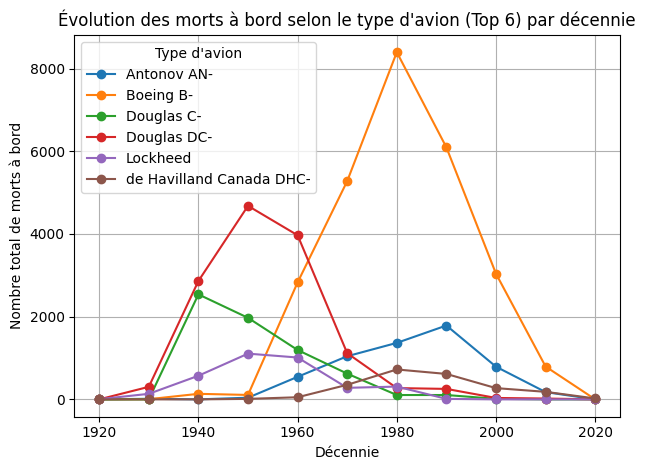

In [ ]:
# Simplifier les noms d'avions à partir de la colonne "AC Type"
df['simplified_type'] = df['AC Type'].astype(str).str.extract(r'([A-Za-z\- ]{3,})')
df['simplified_type'] = df['simplified_type'].str.strip()

# Sélectionner les 6 types d'appareils les plus fréquents
top_types = df['simplified_type'].value_counts().nlargest(6).index
df_top_types = df[df['simplified_type'].isin(top_types)]

# Regrouper par décennie et type pour sommer les morts à bord
grouped = df_top_types.groupby(['decade', 'simplified_type'])['Aboard'].sum().unstack().fillna(0)

# Tracer le graphique
plt.figure(figsize=(12, 6))
grouped.plot(kind='line', marker='o')
plt.title("Évolution des morts à bord selon le type d'avion (Top 6) par décennie")
plt.xlabel("Décennie")
plt.ylabel("Nombre total de morts à bord")
plt.grid(True)
plt.legend(title="Type d'avion")
plt.tight_layout()
plt.show()

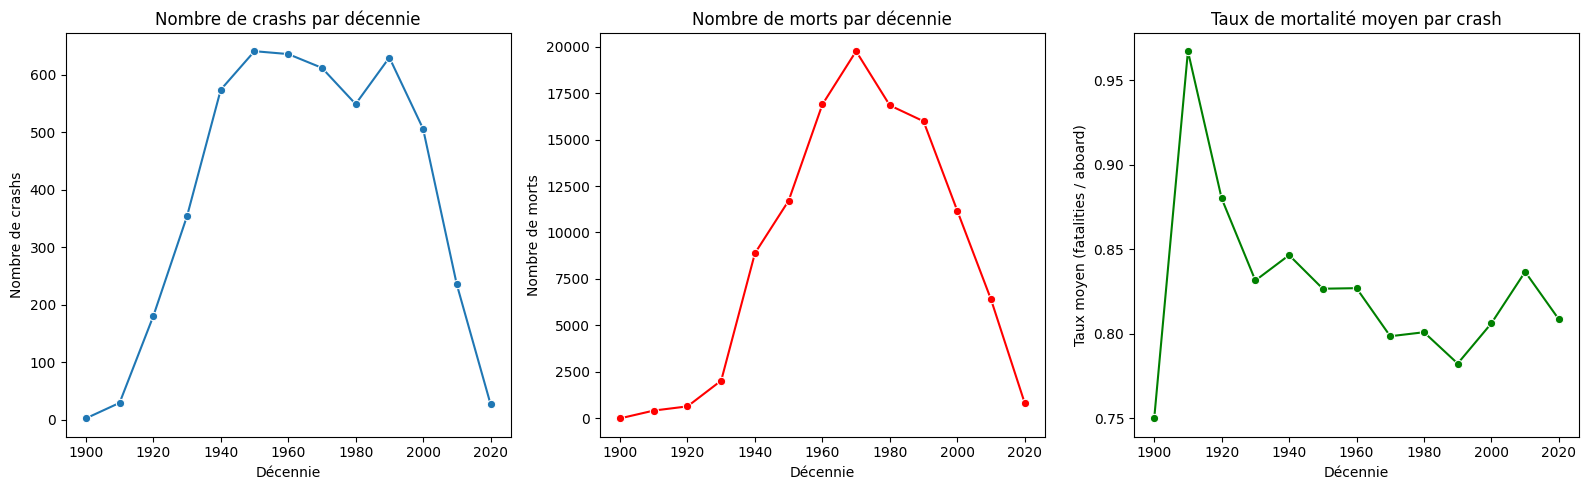

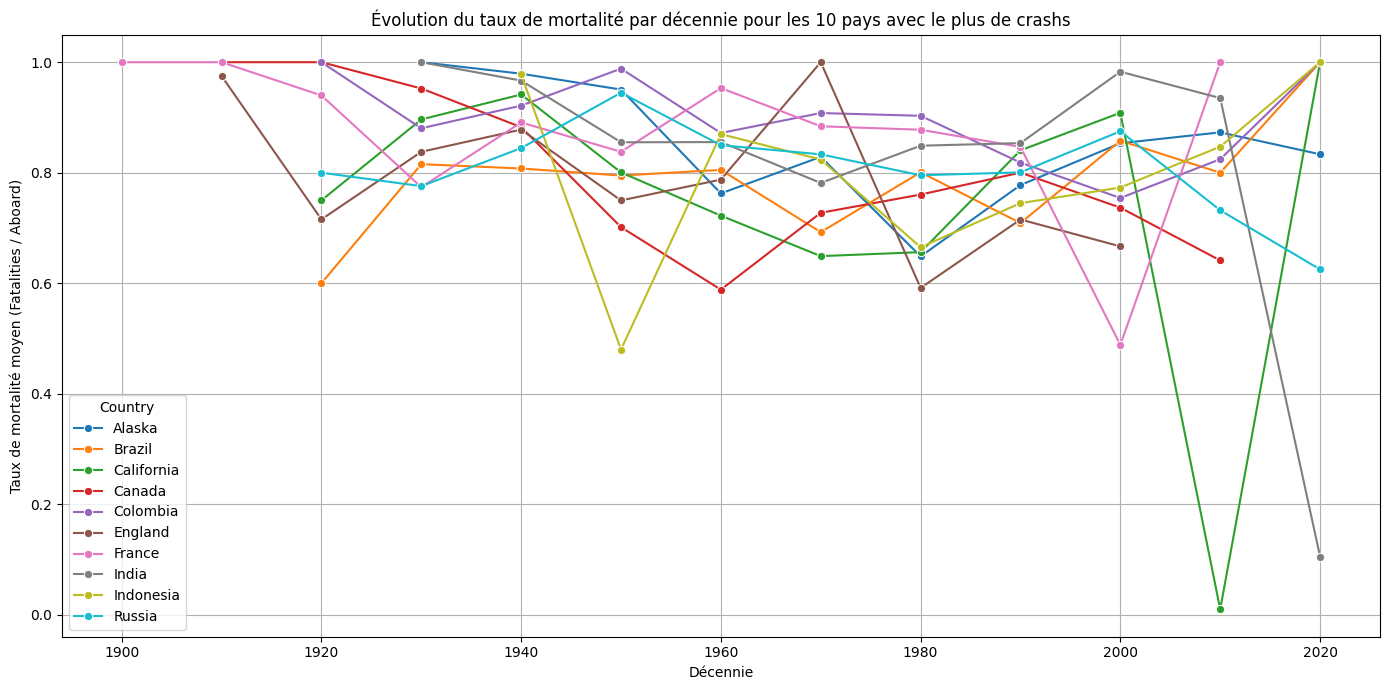

In [ ]:
warnings.filterwarnings("ignore")

# Nettoyage des colonnes numériques
for col in ['Aboard', 'Fatalities', 'Ground']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Suppression des lignes sans info capitale
df = df.dropna(subset=['Aboard', 'Fatalities'])
df = df[df['Aboard'] > 0]

# Création du pays à partir de la location
df['Country'] = df['Location'].str.extract(r'([A-Za-z\s]+)$')
df['Country'] = df['Country'].str.strip()

# Taux de mortalité
df['FatalityRate'] = df['Fatalities'] / df['Aboard']

# ==== ANALYSE PAR DÉCENNIE ====

# Crashes par décennie
crashes_by_decade = df.groupby('Decade').size()

# Décès par décennie
deaths_by_decade = df.groupby('Decade')['Fatalities'].sum()

# Taux de mortalité moyen par décennie
fatality_rate_by_decade = df.groupby('Decade')['FatalityRate'].mean()

# ===== VISUALISATION =====

plt.figure(figsize=(16, 5))

# Nombre de crashs
plt.subplot(1, 3, 1)
sns.lineplot(x=crashes_by_decade.index, y=crashes_by_decade.values, marker='o')
plt.title("Nombre de crashs par décennie")
plt.xlabel("Décennie")
plt.ylabel("Nombre de crashs")

# Nombre de morts
plt.subplot(1, 3, 2)
sns.lineplot(x=deaths_by_decade.index, y=deaths_by_decade.values, marker='o', color='red')
plt.title("Nombre de morts par décennie")
plt.xlabel("Décennie")
plt.ylabel("Nombre de morts")

# Taux de mortalité
plt.subplot(1, 3, 3)
sns.lineplot(x=fatality_rate_by_decade.index, y=fatality_rate_by_decade.values, marker='o', color='green')
plt.title("Taux de mortalité moyen par crash")
plt.xlabel("Décennie")
plt.ylabel("Taux moyen (fatalities / aboard)")

plt.tight_layout()
plt.show()

# Top 10 pays avec le plus de crashs
top_countries = df['Country'].value_counts().head(10).index
df_top = df[df['Country'].isin(top_countries)]

# Moyenne des taux de mortalité par pays et décennie
pivot = df_top.groupby(['Country', 'Decade'])['FatalityRate'].mean().reset_index()

# Graphique pays/décennie
plt.figure(figsize=(14, 7))
sns.lineplot(data=pivot, x='Decade', y='FatalityRate', hue='Country', marker='o')
plt.title('Évolution du taux de mortalité par décennie pour les 10 pays avec le plus de crashs')
plt.xlabel('Décennie')
plt.ylabel('Taux de mortalité moyen (Fatalities / Aboard)')
plt.grid(True)
plt.tight_layout()
plt.show()

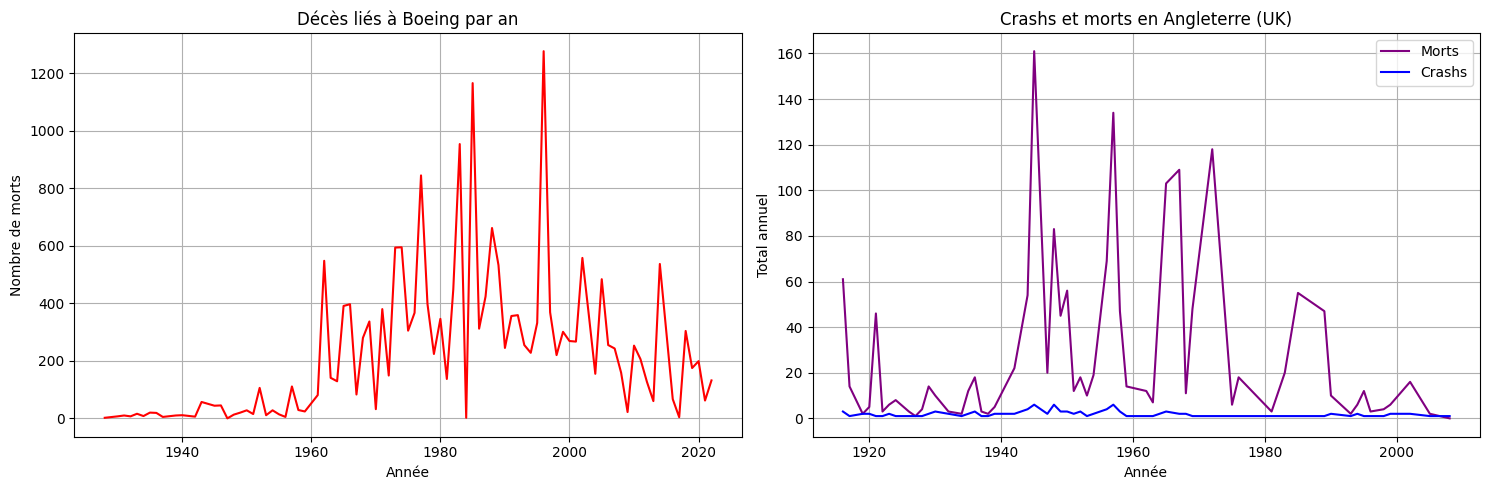

In [24]:
# Filtrer les lignes où l'opérateur contient 'Boeing'
df_boeing = df[df['AC Type'].str.contains('Boeing', na=False)]
boeing_deaths = df_boeing.groupby('Year')['Fatalities'].sum()

# Filtrer les lignes en Angleterre
df_uk = df[df['Country'].str.contains('England|United Kingdom|UK', na=False)]
uk_deaths = df_uk.groupby('Year')['Fatalities'].sum()
uk_crashes = df_uk.groupby('Year').size()

# === VISUALISATIONS ===

plt.figure(figsize=(15, 5))

# Boeing fatalities
plt.subplot(1, 2, 1)
sns.lineplot(x=boeing_deaths.index, y=boeing_deaths.values, color='red')
plt.title("Décès liés à Boeing par an")
plt.xlabel("Année")
plt.ylabel("Nombre de morts")
plt.grid(True)

# UK fatalities + crashes
plt.subplot(1, 2, 2)
sns.lineplot(x=uk_deaths.index, y=uk_deaths.values, label="Morts", color='purple')
sns.lineplot(x=uk_crashes.index, y=uk_crashes.values, label="Crashs", color='blue')
plt.title("Crashs et morts en Angleterre (UK)")
plt.xlabel("Année")
plt.ylabel("Total annuel")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

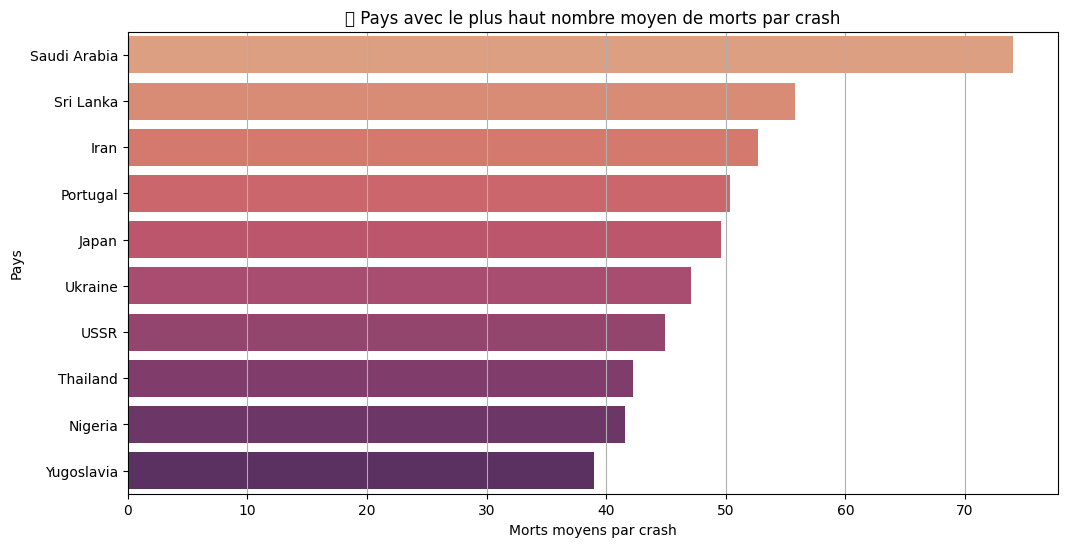

In [ ]:
# Par pays (on filtre ceux avec au moins 10 crashs pour éviter le bruit)
crash_counts = df.groupby('Country').size()
deaths_by_country = df.groupby('Country')['Fatalities'].sum()
mean_deaths = (deaths_by_country / crash_counts).dropna()

# Ne garder que les pays avec assez de données
mean_deaths = mean_deaths[crash_counts >= 10].sort_values(ascending=False)

# Visualiser le top 10
plt.figure(figsize=(12,6))
sns.barplot(x=mean_deaths.head(10).values, y=mean_deaths.head(10).index, palette='flare')
plt.title("Pays avec le plus haut nombre moyen de morts par crash")
plt.xlabel("Morts moyens par crash")
plt.ylabel("Pays")
plt.grid(axis='x')
plt.show()

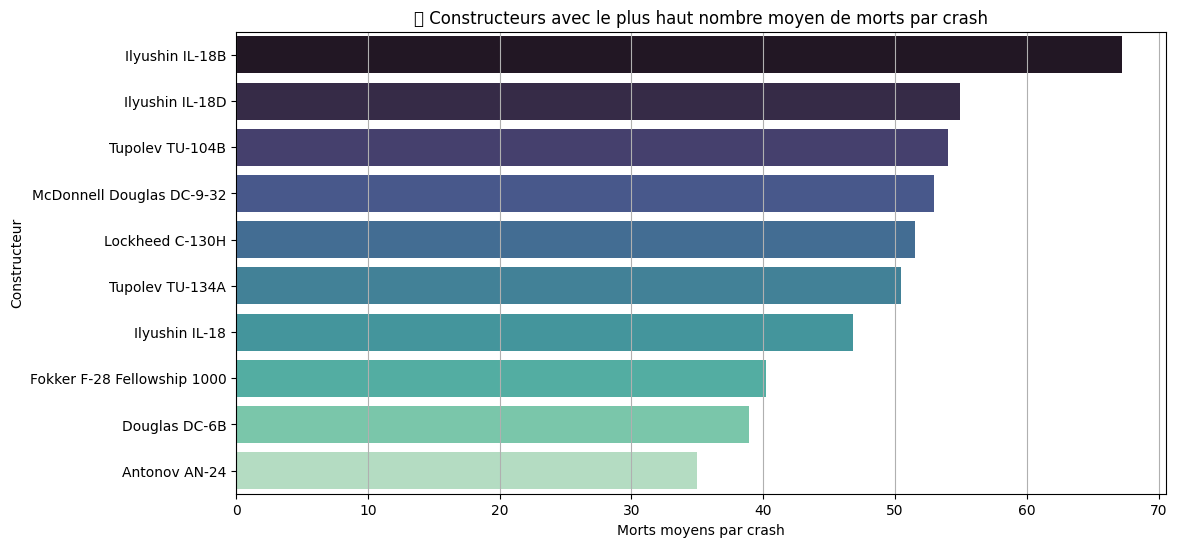

In [ ]:
# Par constructeur (Type), on garde les grandes marques
type_counts = df['AC Type'].value_counts()
valid_types = type_counts[type_counts >= 10].index

df_type_filtered = df[df['AC Type'].isin(valid_types)]
deaths_by_type = df_type_filtered.groupby('AC Type')['Fatalities'].sum()
crashs_by_type = df_type_filtered.groupby('AC Type').size()
mean_deaths_type = (deaths_by_type / crashs_by_type).sort_values(ascending=False)

# Visualiser
plt.figure(figsize=(12,6))
sns.barplot(x=mean_deaths_type.head(10).values, y=mean_deaths_type.head(10).index, palette='mako')
plt.title("Constructeurs avec le plus haut nombre moyen de morts par crash")
plt.xlabel("Morts moyens par crash")
plt.ylabel("Constructeur")
plt.grid(axis='x')
plt.show()